### Business Problem
As a marketing agency, our primary objective is to maximize the Return on Investment(ROI) for our clients' advertising campaigns. We have conducted two ad campaigns, one on Facebook and the other on AdWords, and we need to determine which platform yields better results in terms of clicks, conversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficientlyt and optimize our advertising strategies to deliver better outcomes for our clients.

### Research Question
**Which ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?**

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ABmarketing_campaign.csv')

In [3]:
df

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,12/27/2019,FB_Dec19,3240,51,13,$63,1.57%,25.89%,$1.24,AW_Dec19,5332,72,9,$76,1.35%,11.92%,$1.06
361,12/28/2019,FB_Dec19,1510,69,18,$97,4.55%,25.82%,$1.42,AW_Dec19,3887,49,6,$121,1.27%,13.10%,$2.46
362,12/29/2019,FB_Dec19,2918,44,13,$49,1.50%,29.11%,$1.11,AW_Dec19,5327,62,6,$128,1.16%,9.85%,$2.08
363,12/30/2019,FB_Dec19,2212,37,8,$102,1.68%,22.70%,$2.75,AW_Dec19,4020,71,6,$119,1.76%,7.83%,$1.68


In [4]:
df.shape

(365, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Date                                             365 non-null    object
 1   Facebook Ad Campaign                             365 non-null    object
 2   Facebook Ad Views                                365 non-null    int64 
 3   Facebook Ad Clicks                               365 non-null    int64 
 4   Facebook Ad Conversions                          365 non-null    int64 
 5   Cost per Facebook Ad                             365 non-null    object
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    object
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object
 8   Facebook Cost per Click (Ad Cost / Clicks)       365 non-null    object
 9   AdWords Ad Campaign                        

In [6]:
df.Date = pd.to_datetime(df.Date)

In [7]:
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


#### Comparing Campaigns performance

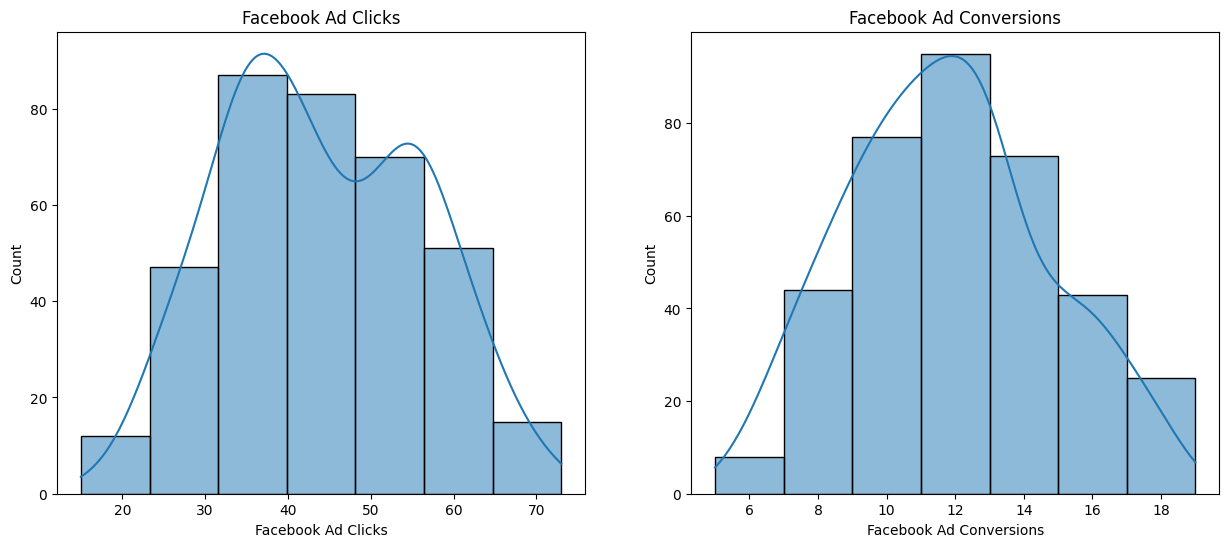

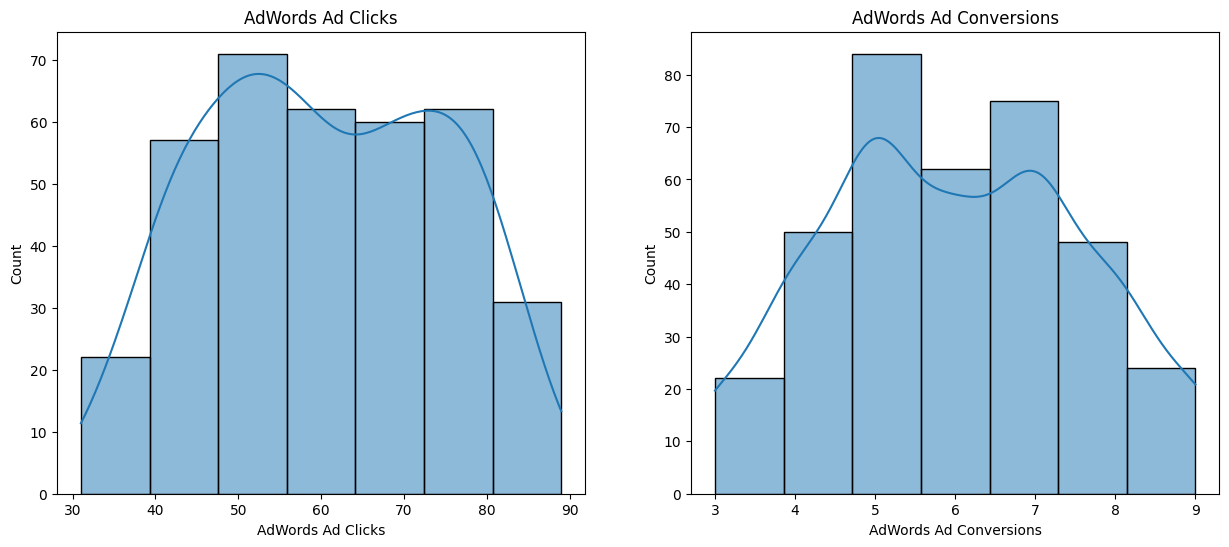

In [8]:
# distribution of the clicks and conversions
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Facebook Ad Clicks")
sns.histplot(df['Facebook Ad Clicks'], bins = 7, edgecolor = 'k', kde= True)
plt.subplot(1,2,2)
plt.title("Facebook Ad Conversions")
sns.histplot(df['Facebook Ad Conversions'], bins = 7, edgecolor = 'k', kde= True)
plt.show()


plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("AdWords Ad Clicks")
sns.histplot(df['AdWords Ad Clicks'], bins = 7, edgecolor = 'k', kde= True)
plt.subplot(1,2,2)
plt.title("AdWords Ad Conversions")
sns.histplot(df['AdWords Ad Conversions'], bins = 7, edgecolor = 'k', kde= True)
plt.show()

All the histograms are showing somewhat symmetrical shape. This symmetrical shape suggests that the number of clicks and conversions is relatively evenly distributed. In other words, there are not many clicks or conversions that are outliers on either the high or low end.

**How frequently do we observe days with high number of conversions compared to days with low number of conversions?**

In [9]:
df['Facebook Ad Conversions']

0       8
1      12
2       8
3       9
4       7
       ..
360    13
361    18
362    13
363     8
364    17
Name: Facebook Ad Conversions, Length: 365, dtype: int64

In [10]:
def create_conversion_category(conversion_col):
    category = []
    for conversion in df[conversion_col]:
        if conversion < 6:
            category.append('less than 6')
        elif 6 <= conversion < 11:
            category.append('6 - 10')
        elif 11 <= conversion < 16:
            category.append('10 - 15')
        else:
            category.append('more than 15')
    return category

# applying function of different campaign's conversions
df['Facebook Conversion Category'] = create_conversion_category('Facebook Ad Conversions')
df['AdWords Conversion Category'] = create_conversion_category('AdWords Ad Conversions')

In [11]:
df[['Facebook Ad Conversions', 'Facebook Conversion Category', 'AdWords Ad Conversions', 'AdWords Conversion Category']]

,Facebook Ad Conversions,Facebook Conversion Category,AdWords Ad Conversions,AdWords Conversion Category
0,8,6 - 10,5,less than 6
1,12,10 - 15,6,6 - 10
2,8,6 - 10,4,less than 6
3,9,6 - 10,5,less than 6
4,7,6 - 10,7,6 - 10
...,...,...,...,...
360,13,10 - 15,9,6 - 10
361,18,more than 15,6,6 - 10
362,13,10 - 15,6,6 - 10
363,8,6 - 10,6,6 - 10


In [12]:
df['Facebook Conversion Category'].value_counts()

Facebook Conversion Category
10 - 15         189
6 - 10          128
more than 15     47
less than 6       1
Name: count, dtype: int64

In [13]:
facebook = pd.DataFrame(df['Facebook Conversion Category'].value_counts()).reset_index().rename(columns = {'Facebook Conversion Category':'Category'})
facebook

,Category,count
0,10 - 15,189
1,6 - 10,128
2,more than 15,47
3,less than 6,1


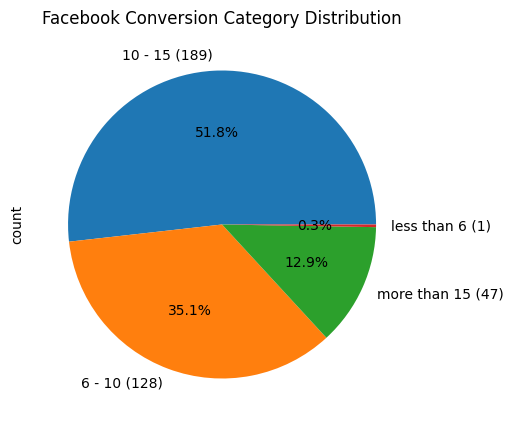

In [14]:
counts = df['Facebook Conversion Category'].value_counts()

# Plot pie chart with actual counts as labels
counts.plot.pie(
    figsize=(5, 5),
    labels=[f'{label} ({count})' for label, count in counts.items()],
autopct = '%1.1f%%')
plt.title('Facebook Conversion Category Distribution')
plt.show()

In [15]:
df['AdWords Conversion Category'].value_counts()

AdWords Conversion Category
6 - 10         209
less than 6    156
Name: count, dtype: int64

In [16]:
adwords = pd.DataFrame(df['AdWords Conversion Category'].value_counts()).reset_index().rename(columns = {'AdWords Conversion Category':'Category'})
adwords

,Category,count
0,6 - 10,209
1,less than 6,156


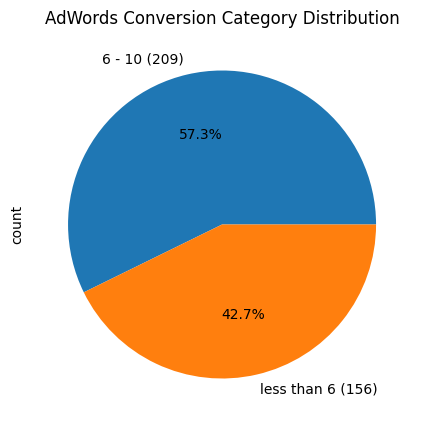

In [17]:
counts = df['AdWords Conversion Category'].value_counts()

# Plot pie chart with actual counts as labels
counts.plot.pie(
    figsize=(5, 5),
    labels=[f'{label} ({count})' for label, count in counts.items()],
autopct = '%1.1f%%')
plt.title('AdWords Conversion Category Distribution')
plt.show()

In [18]:
category_df = pd.merge(facebook, adwords, on = 'Category', how='outer').fillna(0)
category_df

,Category,count_x,count_y
0,10 - 15,189,0.0
1,6 - 10,128,209.0
2,less than 6,1,156.0
3,more than 15,47,0.0


In [19]:
category_df = category_df.iloc[[3,1,0,2]]
category_df

,Category,count_x,count_y
3,more than 15,47,0.0
1,6 - 10,128,209.0
0,10 - 15,189,0.0
2,less than 6,1,156.0


In [20]:
X_axis = np.arange(len(category_df))
X_axis

array([0, 1, 2, 3])

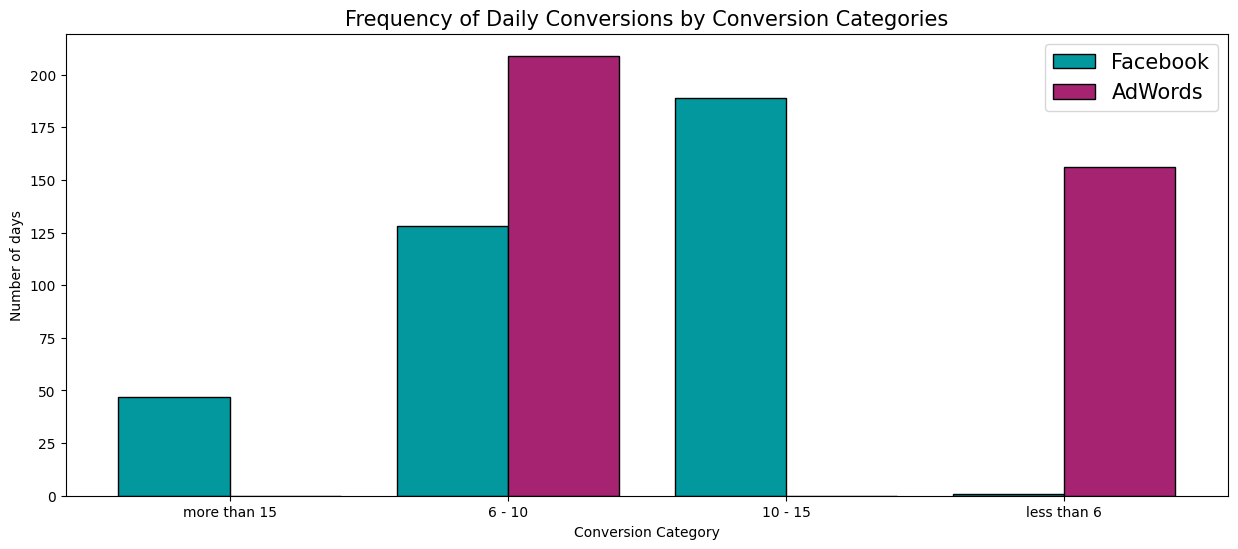

In [21]:
plt.figure(figsize=(15,6))
plt.bar(X_axis - 0.2, category_df['count_x'], 0.4, label = 'Facebook', color = '#03989E', linewidth = 1, edgecolor = 'k')
plt.bar(X_axis + 0.2, category_df['count_y'], 0.4, label = 'AdWords', color = '#A62372', linewidth = 1, edgecolor = 'k')

plt.xticks(X_axis, category_df['Category'])
plt.xlabel('Conversion Category')
plt.ylabel('Number of days')
plt.title('Frequency of Daily Conversions by Conversion Categories', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

- The data suggests Facebook had more frequent higher conversion days than AdWords, which either had very low conversion rates (less than 6) or moderate ones (6 - 10)
- There is a significant variance in the number of high-conversion days between two different campaigns.
- The absence of any days with conversions between 10-15 and more than 15 in AdWords indicates a need to review what strategies were changed or what external factors could have influenced these numbers.

#### Do more clicks on the ad really lead to more sales?

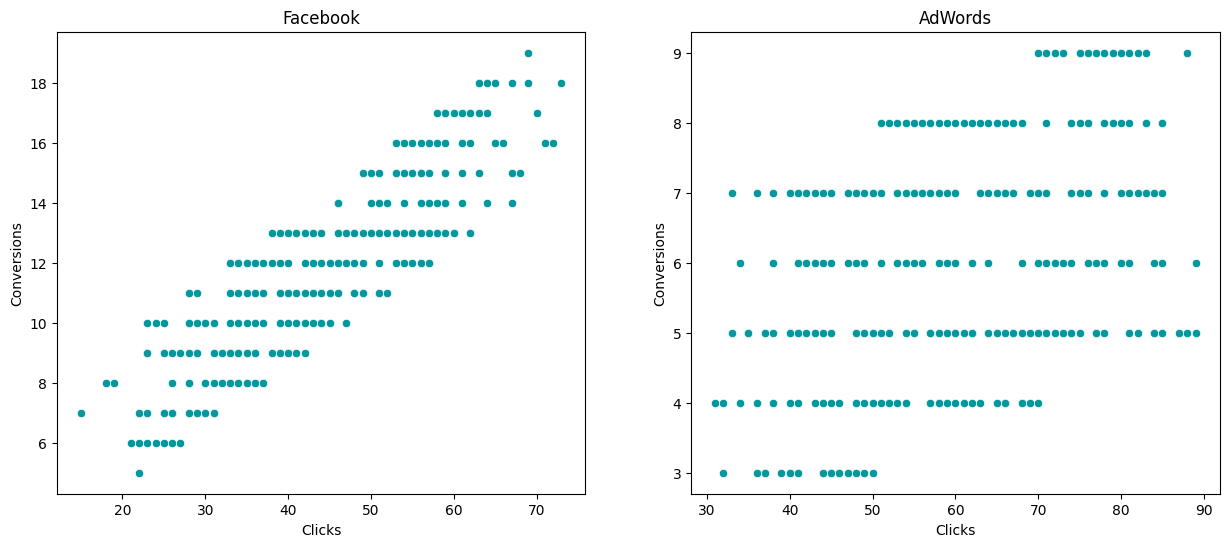

In [22]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.title("Facebook")
sns.scatterplot(x=df["Facebook Ad Clicks"], y=df['Facebook Ad Conversions'], c = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.subplot(1,2,2)
plt.title("AdWords")
sns.scatterplot(x=df["AdWords Ad Clicks"], y=df['AdWords Ad Conversions'], c = '#03989E')
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.show()

In [23]:
facebook_corr = df[['Facebook Ad Clicks', 'Facebook Ad Conversions']].corr()
facebook_corr

,Facebook Ad Clicks,Facebook Ad Conversions
Facebook Ad Clicks,1.000000,0.873775
Facebook Ad Conversions,0.873775,1.000000


In [24]:
adwords_corr = df[['AdWords Ad Clicks', 'AdWords Ad Conversions']].corr()
adwords_corr

,AdWords Ad Clicks,AdWords Ad Conversions
AdWords Ad Clicks,1.000000,0.447993
AdWords Ad Conversions,0.447993,1.000000


In [25]:
print('Correlation Coefficient:\n--------------------')
print('Facebook: ', round(facebook_corr.values[0,1],2))
print('AdWords: ', round(adwords_corr.values[0,1],2))

Correlation Coefficient:
--------------------
Facebook:  0.87
AdWords:  0.45


- A correlation coefficient of 0.87 indicates a strong positive linear relationship between clicks on Facebook ads and sales. This suggests that as the number of clicks on Facebook ads increases, sales tend to increase as well.
- This strong correlation suggests that Facebook ads are highly effective in driving sales, as a large portion of the variation in sales can be explained by the variation in clicks on Facebook ads.
- The strong correlation between clicks on Facebook ads and sales suggests that Facebook advertising is highly effective in driving sales for the business. Increasing investment in Facebook ads or optimizing their performance could potentially lead to even higher sales.
- A correlation of 0.45 indicates a moderate positive linear relationship between clicks on AdWords ads and sales. While there is still a positive relationship, it is not as strong as with Facebook ads.
- The moderate correlation between clicks on AdWords ads  and sales indicates that while AdWords advertising does contribute to sales, its effectiveness may be influenced by other factors. Further analysis is needed to identify these factors and optimize AdWords campaigns accordingly.

#### Hypothesis Testing
**Hypothesis:** Advertising on Facebook will result in a greater number of conversions compared to advertising on AdWords.

**Null Hypothesis:** There is no difference in the number of conversions between Facebook and AdWords, or the number of conversions from AdWords is greater than or equal to those from Facebook.

H0: μ_Facebook ≤ μ_AdWords

**Alternative Hypothesis:** The number of conversions from Facebook is greater than the number of conversions from AdWords. 

H1: μ_Facebook > μ_AdWords

In [26]:
print('Mean Conversion \n---------------------------')
print('Facebook: ', round(df['Facebook Ad Conversions'].mean(),2))
print('AdWords: ', round(df['AdWords Ad Conversions'].mean(),2))

Mean Conversion 
---------------------------
Facebook:  11.74
AdWords:  5.98


In [27]:
t_stats, p_value = st.ttest_ind(a=df['Facebook Ad Conversions'], b=df['AdWords Ad Conversions'], equal_var = False)
print('T Statistic: ', t_stats, '\np-value: ', p_value)

# comparing the p-value with the significance of 5% or 0.05
if p_value < 0.05:
    print('\np-value is less than significance value, Reject the null hypothesis.')
else:
    print('\np-value is greater than significance value, Accept the null hypothesis.')

T Statistic:  32.88402060758184 
p-value:  9.348918164530465e-134

p-value is less than significance value, Reject the null hypothesis.


- The mean number of coversions form Facebook ads (11.74) is substantially higher than the mean number of conversions from AdWords ads (5.98). This suggests that, on average, Facebook advertising is more effective in generating conversions compareed to AdWords advertising.
- The T statistic (32.88) is a measure of the difference between the means of the two groups relative to the variation within the groups. A larger T statistic indicates a greater difference between the means oif the two groups.
- The p-value (9.35e-134) is extremely small, indication strong evidence against the null hypothesis.
- The results strongly support the alternative hypothesis, indicating that the number of conversions from Facebook advertising is indeed greater than the number of conversions from AdWords advertising.
- Facebook advertising appears to be more effective channel for generating conversions compared to AdWords advertising, based on the sample data analyzed.
- Given the significant difference in conversion rates between Facebook and AdWords, consider reallocating resources towards Facebook advertising efforts. This could involve increasing ad spend, expanding tegeting efforts, or experimenting with different ad formats to capitalize on the platform's effectiveness in driving conversions.

#### Regression Analysis
**What will happen when I do go with the Facebook Ad? How many facebook ad conversions can I expect given a certain number of facebook ad clicks?**

In [28]:
# independent variable
X = df[['Facebook Ad Clicks']]
# dependent variable
y = df[['Facebook Ad Conversions']]

# initializing and fitting Linear Regression model
reg_model = LinearRegression()
reg_model.fit(X,y)
prediction = reg_model.predict(X)

In [29]:
# model evaluation
r2 = r2_score(y, prediction)*100
mse = mean_squared_error(y, prediction)
print('Accuracy (R2 Score): ', round(r2,2), '%')
print('Mean Squared Error: ', round(mse,2))

Accuracy (R2 Score):  76.35 %
Mean Squared Error:  2.02


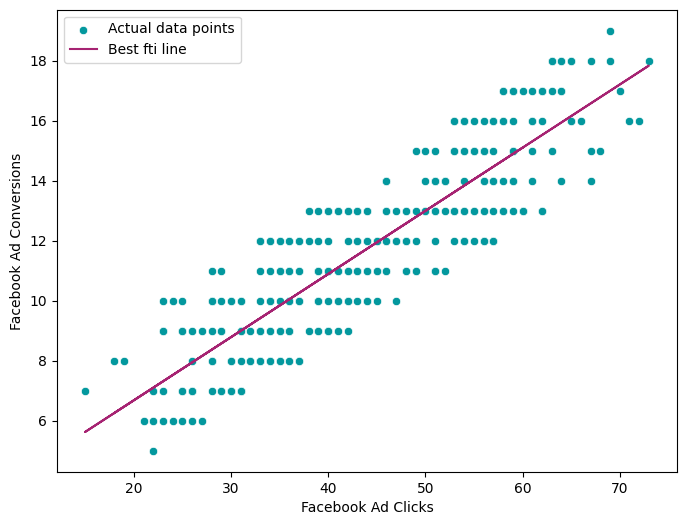

In [30]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'], color = '#03989E', label = 'Actual data points')
plt.plot(df['Facebook Ad Clicks'], prediction, color = '#A62372', label = 'Best fti line')
plt.legend()
plt.show()

In [31]:
print(f'For {50} clicks, Expected Conversion : {round(reg_model.predict([[50]])[0][0],2)}')
print(f'For {80} clicks, Expected Conversion : {round(reg_model.predict([[80]])[0][0],2)}')

For 50 clicks, Expected Conversion : 13.0
For 80 clicks, Expected Conversion : 19.31


- The model has a reasonably good predictive power, with an R2 score of 76.35%. This suggests that it can effectively predict Facebook ad conversions based on the number of Facebook ad clicks.
- With the insights provided by the Linear Regression model, businesses can make informed decisions about resource allocation, budget planning, and campaign optimization.
- For instance, knowing the expected number of Facebook ad conversions based on a certain number of Facebook ad clicks can help in setting realistic campaign goals, optimizing ad spend, and assessing the ROI of Facebook advertising effots.

### Analyzing Facebook Campaign metrics over time

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 19 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             365 non-null    datetime64[ns]
 1   Facebook Ad Campaign                             365 non-null    object        
 2   Facebook Ad Views                                365 non-null    int64         
 3   Facebook Ad Clicks                               365 non-null    int64         
 4   Facebook Ad Conversions                          365 non-null    int64         
 5   Cost per Facebook Ad                             365 non-null    object        
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    object        
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object        
 8   Facebook Cost per Click (Ad Cost / Click

In [33]:
# cleaning data (removing unwanted symbols from the columns and converting them to numerical columns)
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(lambda x: float(x[1:]))
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(lambda x: float(x[:-1]))
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(lambda x: float(x[:-1]))
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(lambda x: float(x[1:]))

In [34]:
df

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks),Facebook Conversion Category,AdWords Conversion Category
0,2019-01-01,FB_Jan19,2116,18,8,126.0,0.83,42.73,7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30,6 - 10,less than 6
1,2019-01-02,FB_Jan19,3106,36,12,104.0,1.15,34.04,2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05,10 - 15,6 - 10
2,2019-01-03,FB_Jan19,3105,26,8,102.0,0.84,31.45,3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23,6 - 10,less than 6
3,2019-01-04,FB_Jan19,1107,27,9,71.0,2.45,34.76,2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86,6 - 10,less than 6
4,2019-01-05,FB_Jan19,1317,15,7,78.0,1.10,47.59,5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40,6 - 10,6 - 10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2019-12-27,FB_Dec19,3240,51,13,63.0,1.57,25.89,1.24,AW_Dec19,5332,72,9,$76,1.35%,11.92%,$1.06,10 - 15,6 - 10
361,2019-12-28,FB_Dec19,1510,69,18,97.0,4.55,25.82,1.42,AW_Dec19,3887,49,6,$121,1.27%,13.10%,$2.46,more than 15,6 - 10
362,2019-12-29,FB_Dec19,2918,44,13,49.0,1.50,29.11,1.11,AW_Dec19,5327,62,6,$128,1.16%,9.85%,$2.08,10 - 15,6 - 10
363,2019-12-30,FB_Dec19,2212,37,8,102.0,1.68,22.70,2.75,AW_Dec19,4020,71,6,$119,1.76%,7.83%,$1.68,6 - 10,6 - 10


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 19 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             365 non-null    datetime64[ns]
 1   Facebook Ad Campaign                             365 non-null    object        
 2   Facebook Ad Views                                365 non-null    int64         
 3   Facebook Ad Clicks                               365 non-null    int64         
 4   Facebook Ad Conversions                          365 non-null    int64         
 5   Cost per Facebook Ad                             365 non-null    float64       
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    float64       
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    float64       
 8   Facebook Cost per Click (Ad Cost / Click

In [37]:
# filtering for facebook campaign
df = df[['Date',
        'Facebook Ad Views',
        'Facebook Ad Clicks', 
        'Facebook Ad Conversions', 
        'Cost per Facebook Ad', 
        'Facebook Click-Through Rate (Clicks / View)',
        'Facebook Conversion Rate (Conversions / Clicks)',
        'Facebook Cost per Click (Ad Cost / Clicks)']]
df

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2019-01-01,2116,18,8,126.0,0.83,42.73,7.14
1,2019-01-02,3106,36,12,104.0,1.15,34.04,2.91
2,2019-01-03,3105,26,8,102.0,0.84,31.45,3.89
3,2019-01-04,1107,27,9,71.0,2.45,34.76,2.62
4,2019-01-05,1317,15,7,78.0,1.10,47.59,5.38
...,...,...,...,...,...,...,...,...
360,2019-12-27,3240,51,13,63.0,1.57,25.89,1.24
361,2019-12-28,1510,69,18,97.0,4.55,25.82,1.42
362,2019-12-29,2918,44,13,49.0,1.50,29.11,1.11
363,2019-12-30,2212,37,8,102.0,1.68,22.70,2.75


#### At what times of the month or days of the week do we observe the conversions?

In [38]:
# extracting month and week day from the date column
df['month'] = df['Date'].dt.month
df['week'] = df['Date'].dt.weekday

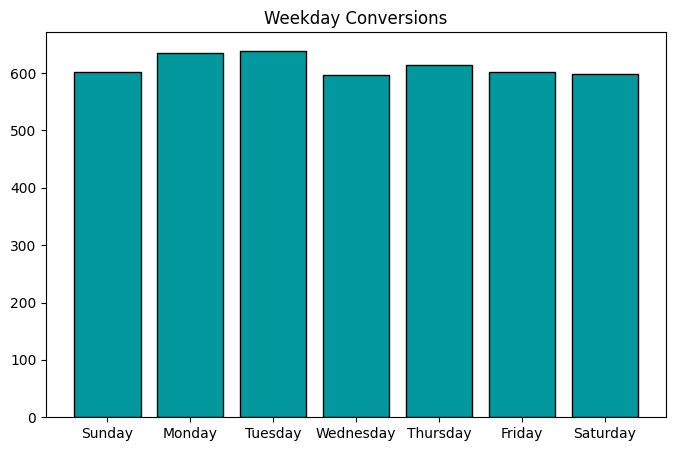

In [39]:
# weekly conversions
plt.figure(figsize=(8,5))
plt.title('Weekday Conversions')
weekly_conversion = df.groupby('week')[['Facebook Ad Conversions']].sum()
week_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.bar(week_names, weekly_conversion['Facebook Ad Conversions'], color = '#03989E', edgecolor = 'k')
plt.show()

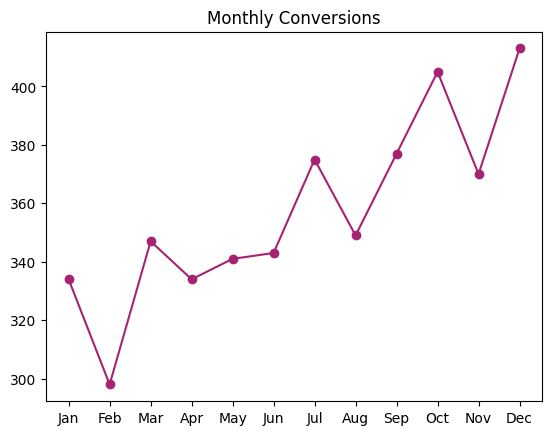

In [41]:
# monthly conversions
plt.title('Monthly Conversions')
monthly_conversion = df.groupby('month')[['Facebook Ad Conversions']].sum()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.plot(month_names, monthly_conversion['Facebook Ad Conversions'], '-o', color = '#A62372')
plt.show()

- Across the weekdays over a year, the total number of conversions remains relatively consistent, indicating a consistent level of engagement throughout the week. However, Mondays and Tuesdays consistently exhibit the highest conversion rates compared to other days, suggesting that the beginning of the workweek sees heightened user engagement or reponsiveness to marketing efforts.
- Examining the monthly trend in conversions reveals an overall upward trajectory, indicating a general increase in conversions over time. However, certain months stand out with variations in conversion rates. February, April, June, August and November experience a decline in conversions compared to neighboring months. These periods of decreased conversion rates could be influenced by factors such as seasonal fluctuations, changes in consumer behavior, or adjustments in marketing strategies.

#### How does the Cost Per Conversion (CPC) trend over time?
Cost Per Conversion (CPC): This metric is used to evaluate the cost effectiveness and profitability of an online advertising campaign. This metric helps marketers understand how much they are spending to obtain each conversion, allowing them to optimize their spending and targeting strategies effectively.

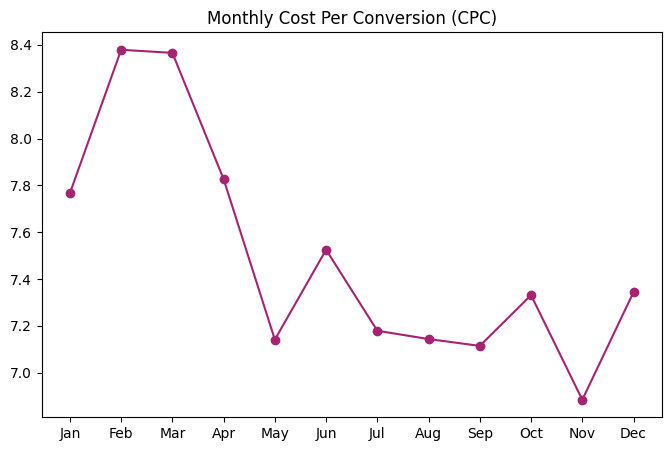

In [43]:
plt.figure(figsize=(8,5))
plt.title('Monthly Cost Per Conversion (CPC)')
monthly_df = df.groupby('month')[['Facebook Ad Conversions', 'Cost per Facebook Ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['Cost per Facebook Ad']/monthly_df['Facebook Ad Conversions']
plt.plot(month_names, monthly_df['Cost per Conversion'], '-o', color = '#A62372')
plt.show()

- The CPC trend over the 12-month period shows some fluctuations but overall maintains a relatively stable range.
- May and November have the lowest CPC values, indicating popentially more cost-effective advertising or higher conversion rates during these periods.
- February has the highest CPC value, suggesting that advertising costs may be relatively higher during this month compared to others.
- Lower CPC values in certain months (e.g., May and November) could indicate periods of higher advertising effectiveness or more favorable market conditions.
- Consider allocating more advertising budget to months with hisrorically lower CPC values (e.g., May and November) to maximize ROI.

#### Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable, proportional impact of budget changes on conversions over time?

In [47]:
score, p_value, _ = coint(df['Cost per Facebook Ad'], df['Facebook Ad Conversions'])
print('Cointegration test score: ', score)
print('P_value: ', p_value)
if p_value < 0.05:
    print('\np-value is less than significance value, Reject the null hypothesis')
else:
    print('\np-value is greater than significance value, Accept the null hypothesis')

Cointegration test score:  -14.755428385103219
P_value:  2.1337375979061323e-26

p-value is less than significance value, Reject the null hypothesis


- Since the p-value is significantly lower that the chosen significance level, we reject the null hypothesis, This indicates that there is a long-term equlibrium relationship between advertising spend (cost) and conversions.
- Businesses can use this understanding of the stable relationship between cost and conversions to optimize their advertising strat